# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Binary (M of N) Integration
***

Binary integration is another form of noncoherent integration, often referred to as $M$ of $N$ detection, and is shown in Figure 6.10.  In this form of integration, each of the $N$ return signals is passed separately through the threshold detector.  There must be $M$ individual detection declarations in order for a target to be declared as present.  Binary integration is somewhat simpler to implement than coherent and noncoherent integration.

The probability of detection for binary integration is written as (Equation 6.24)

$$
    P_{{MN}} = \sum_{k=M}^N C_{{kN}}\cdot p^k\cdot (1-p)^{N-k},
$$

where $p$ is the single pulse probability of detection, and $C_{{kN}}$ is the binomial coefficient given by (Equation 6.25)

$$
    C_{{kN}} = \frac{N!}{k!\, (N-k)!}.
$$

Similarly, the probability of false alarm is (Equation 6.26)

$$
    F_{{MN}} = \sum_{k=M}^N C_{{kN}}\cdot f^k\cdot (1-f)^{N-k},
$$

where $f$ is the single pulse probability of false alarm. For binary integration, some optimum value of $M$ exists that minimizes the required signal-to-noise ratio for given probabilities of detection and false alarm, and a given $N$.  Richards  provides a nice approximation for $M$ for various target fluctuations, which is given here as (Equation 6.27)

$$
    M_{{opt}} = 10^{\beta}\, N^{\alpha},
$$

where the values for $\alpha$ and $\beta$ are given in Table 6.3.
***

Begin by getting the library path

In [1]:
import lib_path

Set the start and end signal to noise ratio (dB)

In [2]:
snr_start = 3.0

snr_end = 20.0

Convert to linear units and create an array using `linspace` from `scipy`

In [3]:
from numpy import linspace

snr = 10.0 ** (linspace(snr_start, snr_end, 200) / 10.0)

Set the probability of false alarm, and the parameters **m** and **n**

In [4]:
pfa = 1e-6

m = 3

n = 5

Calculate the probability of detection for each signal to noise ratio using the `probability_of_detection` routines

In [5]:
from Libs.detection import binary_integration, single_pulse

pd = [binary_integration.probability_of_detection(m, n, single_pulse.pd_rayleigh(isnr, pfa)) for isnr in snr]

Display the probability of detection for binary integration using the `matplotlib` routines

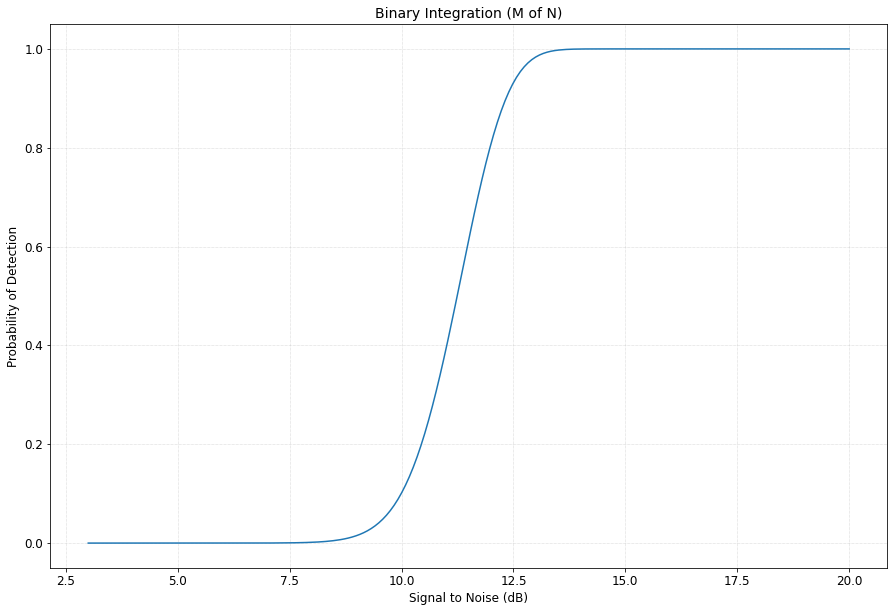

In [6]:
from matplotlib import pyplot as plt

from numpy import log10



# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.plot(10.0 * log10(snr), pd, '')



# Set the plot title and labels

plt.title('Binary Integration (M of N)', size=14)

plt.xlabel('Signal to Noise (dB)', size=12)

plt.ylabel('Probability of Detection', size=12)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)